In [52]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [53]:
# 2. Load Dataset
# Make sure 'UpdatedResumeDataSet.csv' is in your working directory
df = pd.read_csv("UpdatedResumeDataSet.csv")

# Display available columns
print("Available columns:", df.columns)

# We'll use only relevant columns
df = df[['Category', 'Resume']].dropna()
df.head()


Available columns: Index(['Category', 'Resume'], dtype='object')


,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [54]:
print(df.columns)

Index(['Category', 'Resume'], dtype='object')


In [55]:
# 3. Text Preprocessing Function (No NLTK used)
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Remove numbers, punctuation
    tokens = text.split()
    tokens = [word for word in tokens if word not in ENGLISH_STOP_WORDS and len(word) > 2]
    return ' '.join(tokens)

# Apply preprocessing
df['cleaned_resume'] = df['Resume'].apply(preprocess)
df.head()


,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details uitrgpv data scientist data ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas deep learning control design programming...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills python sap hana tableau sap hana sql sa...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...


In [56]:
# NLTK-Free Text Preprocessing
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Remove numbers/punctuation
    tokens = text.split()
    filtered = [word for word in tokens if word not in ENGLISH_STOP_WORDS and len(word) > 2]
    return ' '.join(filtered)

# Apply preprocessing
df['cleaned_resume'] = df['Resume'].apply(preprocess)
df.head()


,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details uitrgpv data scientist data ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas deep learning control design programming...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills python sap hana tableau sap hana sql sa...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...


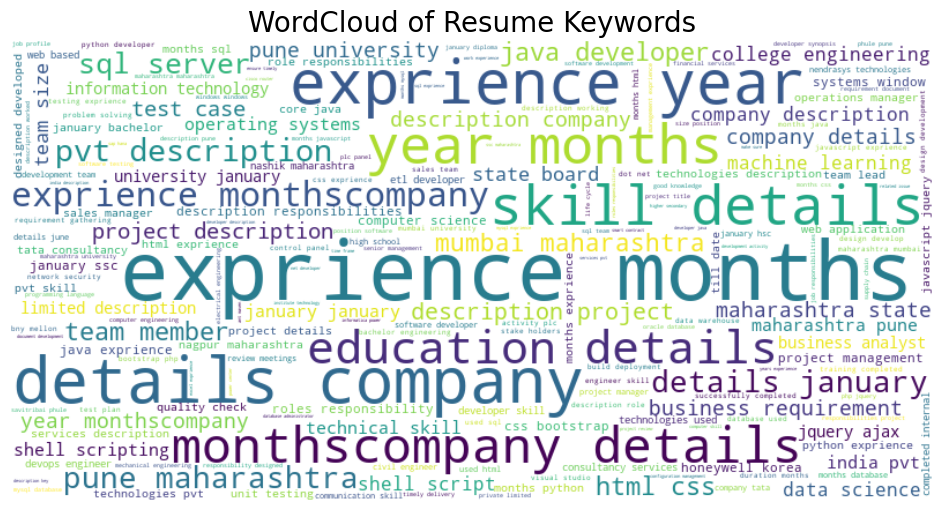

In [57]:
# WordCloud of all resumes
text = ' '.join(df['cleaned_resume'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Resume Keywords", fontsize=20)
plt.show()


In [58]:
# Input a job description and preprocess it
job_description = """
Looking for an experienced Data Analyst with skills in Python, SQL, Tableau, and data visualization.
Should have experience in handling large datasets and building dashboards.
"""
job_desc_cleaned = preprocess(job_description)


In [59]:
# TF-IDF and Cosine Similarity
corpus = df['cleaned_resume'].tolist() + [job_desc_cleaned]

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(corpus)

cosine_sim = cosine_similarity(tfidf_matrix[-1], tfidf_matrix[:-1])
df['similarity_score'] = cosine_sim[0]

# Show top 10 matches
df_sorted = df.sort_values(by='similarity_score', ascending=False)
df_sorted[['Category', 'similarity_score']].head(10)


,Category,similarity_score
16,Data Science,0.285879
36,Data Science,0.285879
6,Data Science,0.285879
26,Data Science,0.285879
39,Data Science,0.178056
9,Data Science,0.178056
29,Data Science,0.178056
19,Data Science,0.178056
772,Hadoop,0.132255
744,Hadoop,0.132255


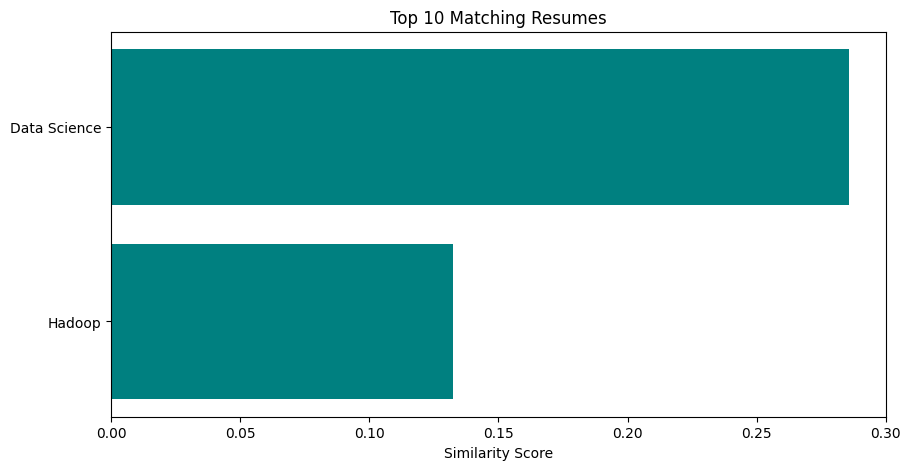

In [60]:
# Plot top 10 matches
top10 = df_sorted.head(10)
plt.figure(figsize=(10, 5))
plt.barh(top10['Category'], top10['similarity_score'], color='teal')
plt.xlabel("Similarity Score")
plt.title("Top 10 Matching Resumes")
plt.gca().invert_yaxis()
plt.show()


In [61]:
# Export Top Matches
top10[['Category', 'Resume', 'similarity_score']].to_csv("Top_Matching_Resumes.csv", index=False)
print("✅ Exported: Top_Matching_Resumes.csv")


✅ Exported: Top_Matching_Resumes.csv


In [62]:
X = df['cleaned_resume']
y = df['Category']


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [64]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'excellent grasping power learning new concepts technology highly motivated team player strong work ethics committed hard work ability work coordinate team effectively enthusiastic selfstarter team player quick independent learnereducation details january bachelor technology information technology branch bput university january diploma engineering brahmapur orissa ucp engineering school software testing automation engineer software testing automation engineer tech mahindra skill details company details company tech mahindra description india duration oct till date project description group plc trading british telecom british multinational telecommunications holding company head offices london united kingdom worked air logistics program banner british telecom project handles web applications carry logistics operation united kingdom various airlines roles responsibilities design develop framework test scenarios test cases developing automation test scripts existing application executing test cases new release involved running test cases logging defects hpqc tool involved formulating test summary report conduct internal test case peer reviews participated daily scrum meetings participated weekly status meetings team developers discuss open issues communicating onsite team company tech mahindra pvt pune tech mahindra description indian multinational company employees spread countries globally total experience years months organization designation duration company tech mahindra description project description att american multinational conglomerate holding company headquartered whitacre tower downtown dallas texas serving software engineer att worked csicam common service interface team responsible running atts centralised solution hub web application called myattcom roles responsibilities design develop maintaing automation test scripts test cases using selenium webdriver desktop window automating tool sikuli autoit executing test cases check working functionality existing application involved trackingmanging test life cycle logging defects using jira hpqcalm involved formulating test summary report conduct internal test case peer reviews participated daily scrum meetings participated weekly status meetings team developers discuss open issues communicating onsite team company tech mahindra pvt pune tech mahindra description till date'

In [ ]:
y_pred = model.predict(X_test)

NameError: name 'model' is not defined

In [ ]:
print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred))


✅ Classification Report:


NameError: name 'classification_report' is not defined

In [ ]:
print("✅ Accuracy:", accuracy_score(y_test, y_pred))

NameError: name 'accuracy_score' is not defined

In [ ]:
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

NameError: name 'confusion_matrix' is not defined

<Figure size 1000x800 with 0 Axes>